In [38]:
import pandas as pd, numpy as np, json, os
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
plt.style.use('seaborn-whitegrid')
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [40]:
m=json.loads(open('ignore/member_timelines.json','r').read())
members=json.loads(open('ignore/member_simple.json','r').read())

In [7]:
d=pd.DataFrame(members['deaths'],index=['v']).T

In [8]:
d['v']=' †'

In [9]:
s=pd.DataFrame(members['s2'],index=['s']).T
s=s.join(d)
s['v']=s['v'].fillna('')
s['s']=s['s']+s['v']
s=s[['s']]

In [10]:
s.head()

,s
Mocioi Ion | 1940-10-03,Ion MOCIOI
Antal Istvan | 1948-06-23,ANTAL István
Giurgiu Mircia | 1964-12-16,Mircia GIURGIU
Andronescu Ecaterina | 1948-04-07,Ecaterina ANDRONESCU
Chircu Doinita-Mariana | 1960-08-13,Doiniţa-Mariana CHIRCU


In [11]:
p=pd.DataFrame(members['part'],index=['Párt ']).T
p.head()

,Párt
Capatina Octavian-Dan | 1948-04-17,🕊️ PUNR - nităţii Naţionale Române
Radu Neculae | 1934-10-18,⚪️ FSN - Salvării Naţionale
Georgescu Ioan | 1941-04-03,⚪️ FSN - Salvării Naţionale
Morcovescu Stelian | 1934-07-23,⚪️ FSN - Salvării Naţionale
Tupilatu Ioan Florin | 1950-09-18,🍀 MER - Ecologistă din România


In [12]:
pcolors = {
        "PRM": "#0d5ca4",
        "UDMR": "green",
        "PDL": "darkOrange",
        "PSD": "#dc2c24",
        "USR": "#04abe4",
        "PAC": "grey",
        "FSN": "grey",
        "PNL": "#f4d42c",
        "PD": "darkOrange",
        "PUNR": "grey",
        "UNPR": "#a8190f",
        "PDSR": "#dc2c24",
        "PNTCD": "#04843c",
        "FC": "#1d7aad",
        "PP-DD": "#9966cc",
        "PAR": "grey",
        "PL'93": "grey",
        "MER": "grey",
        "PMP": "#0484cc",
        "PC": "#96c2f2",
        "FDSN": "grey",
        "ALDE": "#046cab",
        "PUR-SL": "grey",
        "PSDR": "#dc2c24",
        "AUR": "grey",
        "PER": "grey",
        "PNL-CD": "grey",
        "PSM": "grey",
        "FER": "grey",
        "PDAR": "grey",
        "PLS": "grey",
        "PTLDR": "grey",
        "PRNR": "grey",
        "GDC": "grey",
        "PDM": "grey",
        "PNL-AT": "grey",
        "ULB": "grey",
        "Independent": "#444",
        "Minorități": "#999",
        "RMDSZ": "green"
    }
p['Color']=p['Párt '].str.split(' ').str[1].str.strip()
p['Párt  ']=p['Párt '].str.split('-').str[0].str.strip()
p=p.join(pd.DataFrame(pcolors,index=['cvalue']).T,on='Color')

In [13]:
g=pd.DataFrame(members['megye'],index=['Megye ']).T
g.head()

,Megye
Sandu Costin | 1934-05-14,🇷🇴 Buzău
Comisel Constanta | 1934-04-30,🇷🇴 Dolj
Bona Petru | 1940-08-05,🇷🇴 Krassó-Szörény
Sfercoci Gheorghe | 1957-05-10,🇷🇴 Temes
Oarza Florin-Lucian | 1938-12-26,🇷🇴 Iași


In [14]:
data={'Ország':{},'Bizottság':{},'Párt':{},'Megye':{}}
attention={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in list(data.keys()):
        if i['Csoportok'] not in data[i['Típus']]:data[i['Típus']][i['Csoportok']]={}
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if st not in data[i['Típus']][i['Csoportok']]:data[i['Típus']][i['Csoportok']][st]=set()
            data[i['Típus']][i['Csoportok']][st].add(name)            
            if name not in attention:attention[name]={}
            if st not in attention[name]:attention[name][st]=0
            attention[name][st]+=1

0.0 %
3.3083005260197833 %
6.616601052039567 %
9.92490157805935 %
13.233202104079133 %
16.54150263009892 %
19.8498031561187 %
23.15810368213849 %
26.466404208158266 %
29.774704734178055 %
33.08300526019784 %
36.39130578621762 %
39.6996063122374 %
43.007906838257185 %
46.31620736427698 %
49.624507890296755 %
52.93280841631653 %
56.241108942336325 %
59.54940946835611 %
62.85770999437589 %
66.16601052039567 %
69.47431104641547 %
72.78261157243524 %
76.09091209845502 %
79.3992126244748 %
82.70751315049459 %
86.01581367651437 %
89.32411420253416 %
92.63241472855395 %
95.94071525457373 %
99.24901578059351 %


In [15]:
df=pd.DataFrame(attention)

In [16]:
pd.to_datetime('2019-07-01')-pd.to_datetime('2018-01-24')

Timedelta('523 days 00:00:00')

In [17]:
counts=df.count().sort_values(ascending=False)

In [18]:
counts.head(7)

Marton Arpad-Francisc | 1955-03-25             10553
Verestoy Attila | 1954-03-01                   10553
Dumitrescu Cristian-Sorin | 1955-04-24          9702
Seres Denes | 1953-07-21                        9702
Nicolicea Eugen | 1956-06-06                    9702
Niculescu Duvaz Bogdan Nicolae | 1948-12-14     9631
Marko Bela | 1951-09-08                         9631
dtype: int64

In [19]:
switches={}
fusions={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in ['Megye','Párt']:
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if name not in switches:switches[name]={}
            if i['Típus']not in switches[name]:switches[name][i['Típus']]={'count':0,'current':i['Csoportok']}
            if switches[name][i['Típus']]['current']!=i['Csoportok']:
                p1=i['Csoportok']
                p2=switches[name][i['Típus']]['current']
                if i['Típus'] not in fusions:fusions[i['Típus']]={}
                if p1 not in fusions[i['Típus']]:fusions[i['Típus']][p1]={}
                if p2 not in fusions[i['Típus']][p1]:fusions[i['Típus']][p1][p2]=0
                fusions[i['Típus']][p1][p2]+=1
                switches[name][i['Típus']]['current']=str(i['Csoportok'])
                switches[name][i['Típus']]['count']+=1

0.0 %
3.3083005260197833 %
6.616601052039567 %
9.92490157805935 %
13.233202104079133 %
16.54150263009892 %
19.8498031561187 %
23.15810368213849 %
26.466404208158266 %
29.774704734178055 %
33.08300526019784 %
36.39130578621762 %
39.6996063122374 %
43.007906838257185 %
46.31620736427698 %
49.624507890296755 %
52.93280841631653 %
56.241108942336325 %
59.54940946835611 %
62.85770999437589 %
66.16601052039567 %
69.47431104641547 %
72.78261157243524 %
76.09091209845502 %
79.3992126244748 %
82.70751315049459 %
86.01581367651437 %
89.32411420253416 %
92.63241472855395 %
95.94071525457373 %
99.24901578059351 %


In [20]:
def get_sub(dz,x,k=1):
    part=dz.T[x].sort_values(ascending=False)
    print(part.mean())
    print(part.head(5))
    df=pd.DataFrame(part).join(pd.DataFrame(counts)).join(s)
    df['a']=df[x]/(df[0]/k)
    df=df.replace([np.inf, -np.inf], np.nan)
    df=df[df[0]>365*6] #remove outliers
    part=df.sort_values(by='a',ascending=False)[['a','s']]
    return part

In [21]:
dw=pd.DataFrame({i:{j:switches[i][j]['count'] for j in switches[i]} for i in switches})
part=get_sub(dw,'Párt',365)
megye=get_sub(dw,'Megye',365)

0.5214207250091542
Timis Ioan | 1951-09-17                 6
Ion Vasile | 1950-01-12                 5
Gradinaru Nicolae | 1953-11-05          5
Iliescu Valentin Adrian | 1961-11-01    5
Codirla Liviu | 1968-01-25              5
Name: Párt, dtype: int64
0.06847308678139875
Mihalcescu Carmen-Ileana | 1970-05-14          3
Niculescu Duvaz Bogdan Nicolae | 1948-12-14    3
Nicolaescu Sergiu-Florin | 1930-04-13          3
Banicioiu Nicolae | 1979-03-26                 3
Nicolae Serban | 1968-04-05                    2
Name: Megye, dtype: int64


0.1039675678779857
0.02118676121955755


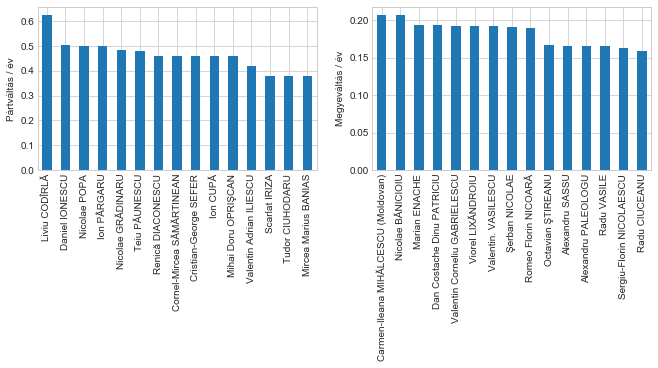

In [22]:
top=15
fig,axes=plt.subplots(1,2,figsize=(11,3))
to_plot=part.set_index('s')['a']
ax=axes[0]
print(to_plot.mean())
ax=to_plot.head(top).plot(kind='bar',ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Pártváltás / év")
to_plot=megye.set_index('s')['a']
ax=axes[1]
print(to_plot.mean())
to_plot.head(top).plot(kind='bar',ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Megyeváltás / év")
plt.savefig('fig/valtas.png',bbox_inches='tight',transparent=True)
plt.show()

Fusions

In [23]:
fusions['part']=fusions['Párt']
fusions.pop('Párt');
open('json/fusions.json','w').write(json.dumps(fusions))

13722

In [24]:
switches2={}
fusions2={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in ['Párt']:
        if not ((i['Típus']=='Párt')and(i['Csoportok']=='👤 Independent - Independent')):        
            for t in pd.date_range(i['start'],i['end']):
                st=str(t)[:10]
                if name not in switches2:switches2[name]={}
                if i['Típus']not in switches2[name]:switches2[name][i['Típus']]={'count':0,'current':i['Csoportok']}
                if switches2[name][i['Típus']]['current']!=i['Csoportok']:
                    p1=i['Csoportok']
                    p2=switches2[name][i['Típus']]['current']
                    if i['Típus'] not in fusions2:fusions2[i['Típus']]={}
                    if p1 not in fusions2[i['Típus']]:fusions2[i['Típus']][p1]={}
                    if p2 not in fusions2[i['Típus']][p1]:fusions2[i['Típus']][p1][p2]=0
                    fusions2[i['Típus']][p1][p2]+=1
                    switches2[name][i['Típus']]['current']=str(i['Csoportok'])
                    switches2[name][i['Típus']]['count']+=1

0.0 %
3.3083005260197833 %
6.616601052039567 %
9.92490157805935 %
13.233202104079133 %
16.54150263009892 %
19.8498031561187 %
23.15810368213849 %
26.466404208158266 %
29.774704734178055 %
33.08300526019784 %
36.39130578621762 %
39.6996063122374 %
43.007906838257185 %
46.31620736427698 %
49.624507890296755 %
52.93280841631653 %
56.241108942336325 %
59.54940946835611 %
62.85770999437589 %
66.16601052039567 %
69.47431104641547 %
72.78261157243524 %
76.09091209845502 %
79.3992126244748 %
82.70751315049459 %
86.01581367651437 %
89.32411420253416 %
92.63241472855395 %
95.94071525457373 %
99.24901578059351 %


In [25]:
fusions2['part']=fusions2['Párt']
fusions2.pop('Párt');
open('json/fusions2.json','w').write(json.dumps(fusions2))

6307

Orszag

In [26]:
countries={}
for k,i in enumerate(m):
    if k%1000==0: print(k/len(m)*100,'%')
    name=i['Simple']
    if i['Típus'] in ['Ország','Bizottság']:
        for t in pd.date_range(i['start'],i['end']):
            st=str(t)[:10]
            if name not in countries:countries[name]={}
            if i['Típus'] not in countries[name]:countries[name][i['Típus']]={}
            if i['Csoportok'] not in countries[name][i['Típus']]:countries[name][i['Típus']][i['Csoportok']]=0
            countries[name][i['Típus']][i['Csoportok']]+=1

0.0 %
3.3083005260197833 %
6.616601052039567 %
9.92490157805935 %
13.233202104079133 %
16.54150263009892 %
19.8498031561187 %
23.15810368213849 %
26.466404208158266 %
29.774704734178055 %
33.08300526019784 %
36.39130578621762 %
39.6996063122374 %
43.007906838257185 %
46.31620736427698 %
49.624507890296755 %
52.93280841631653 %
56.241108942336325 %
59.54940946835611 %
62.85770999437589 %
66.16601052039567 %
69.47431104641547 %
72.78261157243524 %
76.09091209845502 %
79.3992126244748 %
82.70751315049459 %
86.01581367651437 %
89.32411420253416 %
92.63241472855395 %
95.94071525457373 %
99.24901578059351 %


In [27]:
dz=pd.DataFrame({i:{j:sum(countries[i][j].values()) for j in countries[i]} for i in countries}).fillna(0)
dz2=pd.DataFrame({i:{j:len(countries[i][j].values()) for j in countries[i]} for i in countries}).fillna(0)

In [28]:
def get_sum(dz,x):
    part=dz.T[x].sort_values(ascending=False)
    print(part.mean())
    print(part.head(5))
    df=pd.DataFrame(part).join(pd.DataFrame(counts)).join(s).join(d)
    df['v']=df['v'].fillna('')
    df['s']=df['s']+df['v']
    #df=df.set_index('s')
    df['a']=df[x]/(df[0])
    df=df.replace([np.inf, -np.inf], np.nan)
    df=df[df[0]>365*6] #remove outliers
    part=df.sort_values(by='a',ascending=False)[['a','s']]
    return part

In [29]:
orsz1=get_sum(dz2,'Ország')
biz1=get_sum(dz2,'Bizottság')

3.2641509433962264
Stanciu Anghel | 1949-08-15           16.0
Kerekes Karoly | 1947-12-14           16.0
Ion Vasile | 1950-01-12               16.0
Nistor Vasile | 1956-09-08            15.0
Brezniceanu Alexandru | 1941-06-19    15.0
Name: Ország, dtype: float64
1.5867198838896952
Dumitrescu Cristian-Sorin | 1955-04-24    7.0
Stroe Ionut-Marian | 1979-09-23           7.0
Vosganian Varujan | 1958-07-25            7.0
Nicoara Romeo Florin | 1972-11-12         7.0
Borbely Laszlo | 1954-03-26               7.0
Name: Bizottság, dtype: float64


In [30]:
orsz2=get_sum(dz,'Ország')
biz2=get_sum(dz,'Bizottság')

4043.907474600871
Peres Alexandru | 1952-12-20       26403.0
Kerekes Karoly | 1947-12-14        25542.0
Verestoy Attila | 1954-03-01       22899.0
Stanciu Anghel | 1949-08-15        22376.0
Pambuccian Varujan | 1959-04-25    22199.0
Name: Ország, dtype: float64
2115.616473149492
Dumitrescu Cristian-Sorin | 1955-04-24    12112.0
Nicolicea Eugen | 1956-06-06              12020.0
Vosganian Varujan | 1958-07-25            11507.0
Verestoy Attila | 1954-03-01              10999.0
Nistor Vasile | 1956-09-08                10789.0
Name: Bizottság, dtype: float64


1.9919534850085716
1.0259660344167534


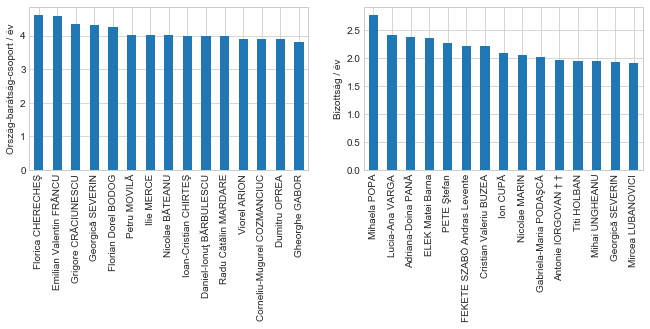

In [31]:
top=15
fig,axes=plt.subplots(1,2,figsize=(11,3))
to_plot=orsz2.set_index('s')['a']
ax=axes[0]
print(to_plot.mean())
to_plot.head(top).plot(kind='bar',ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Ország-barátság-csoport / év")
to_plot=biz2.set_index('s')['a']
ax=axes[1]
print(to_plot.mean())
to_plot.head(top).plot(kind='bar',ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Bizottság / év")
plt.savefig('fig/valtas2.png',bbox_inches='tight',transparent=True)
plt.show()

Scatter

In [32]:
part2=pd.DataFrame(part[['a','s']])
part2.columns=['Part','Név']
megye2=pd.DataFrame(megye['a'])
megye2.columns=['Megye']
sc1=part2.join(megye2).join(p).join(g)

In [33]:
orsz3=pd.DataFrame(orsz2[['a','s']])
orsz3.columns=['Orszag','Név']
biz3=pd.DataFrame(biz2[['a']])
biz3.columns=['Bizottsag']
sc2=orsz3.join(biz3).join(p).join(g)

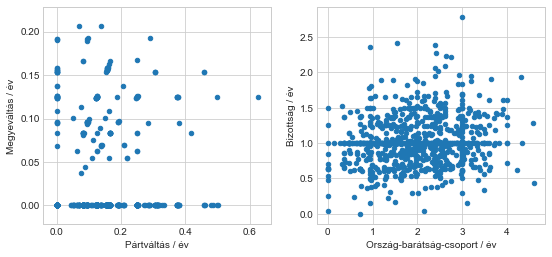

In [34]:
fig,axes=plt.subplots(1,2,figsize=(9,4))
ax=axes[0]
sc1.plot(x='Part',y='Megye',kind='scatter',ax=ax)
ax.set_xlabel('Pártváltás / év')
ax.set_ylabel('Megyeváltás / év')
ax=axes[1]
sc2.plot(x='Orszag',y='Bizottsag',kind='scatter',ax=ax)
ax.set_xlabel('Ország-barátság-csoport / év')
ax.set_ylabel('Bizottság / év')
plt.savefig('fig/valtas3.png',bbox_inches='tight',transparent=True)
plt.show()

In [35]:
from d3IpyPlus import ScatterPlot, LinePlot, BarPlot, StackedArea

In [36]:
sample_data = list(sc1.reset_index().T.to_dict().values())
scplot = ScatterPlot(x={'value':'Part','label':'Pártváltás / év'}, 
                     y={'value':'Megye','label':'Megyeváltás / év'}, id='index', text='Név', color='cvalue', 
                     tooltip=['Párt  ','Megye ','index'],
                     legend=False, width=600, size=6)
scplot.draw(sample_data)
open('scatter1.html','w').write(scplot.dump_html(sample_data))

<IPython.core.display.Javascript object>

260922

In [37]:
sample_data = list(sc2.reset_index().T.to_dict().values())
scplot = ScatterPlot(x={'value':'Orszag','label':'Ország-barátság-csoport / év'}, 
                     y={'value':'Bizottsag','label':'Bizottság / év'}, id='index', text='Név', color='cvalue', 
                     tooltip=['Párt  ','Megye ','index'], 
                     legend=False, width=600, size=6)
scplot.draw(sample_data)
open('scatter2.html','w').write(scplot.dump_html(sample_data))

<IPython.core.display.Javascript object>

284045